Importing libraries

In [18]:
!pip install ta

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29496 sha256=e804f10824a4aa5d700618f2660a955e295802e0ec35b7765f1efd835bae0dd8
  Stored in directory: c:\users\rdine\appdata\local\pip\cache\wheels\e3\3a\ee\4955a26c90a4b7deb6d725dc8ec7b8604a7aef44e43a2e8af7
Successfully built ta


  DEPRECATION: Building 'ta' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'ta'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [63]:
import pandas as pd
import numpy as np
import xgboost as xgb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from xgboost.callback import EarlyStopping

In [48]:
df = pd.read_csv("btc_1d_data_2018_to_2025.csv")

df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595,3961.938946,5.280975e+07,0
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999,2.797171e+08,177728,11346.326739,1.580801e+08,0
2,2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999,2.361169e+08,162787,8994.953566,1.335873e+08,0
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999,3.127816e+08,170310,12680.812951,1.861168e+08,0
4,2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999,3.693220e+08,192969,13346.622293,2.118299e+08,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2705 entries, 0 to 2704
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open time                     2705 non-null   object 
 1   Open                          2705 non-null   float64
 2   High                          2705 non-null   float64
 3   Low                           2705 non-null   float64
 4   Close                         2705 non-null   float64
 5   Volume                        2705 non-null   float64
 6   Close time                    2705 non-null   object 
 7   Quote asset volume            2705 non-null   float64
 8   Number of trades              2705 non-null   int64  
 9   Taker buy base asset volume   2705 non-null   float64
 10  Taker buy quote asset volume  2705 non-null   float64
 11  Ignore                        2705 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 253.7+ KB


In [50]:
df.columns.to_list()

['Open time',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Close time',
 'Quote asset volume',
 'Number of trades',
 'Taker buy base asset volume',
 'Taker buy quote asset volume',
 'Ignore']

Data preprocessing

In [51]:
# Cleaning column name
df.columns = df.columns.str.strip()

In [52]:
df.isna()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2700,False,False,False,False,False,False,False,False,False,False,False,False
2701,False,False,False,False,False,False,False,False,False,False,False,False
2702,False,False,False,False,False,False,False,False,False,False,False,False
2703,False,False,False,False,False,False,False,False,False,False,False,False


[0]	eval-rmse:52747.00929
[1]	eval-rmse:51204.65460
[2]	eval-rmse:49686.90319
[3]	eval-rmse:48277.15086
[4]	eval-rmse:46933.43913
[5]	eval-rmse:45670.25891
[6]	eval-rmse:44445.10078
[7]	eval-rmse:43185.32697
[8]	eval-rmse:42099.90159
[9]	eval-rmse:40961.44382
[10]	eval-rmse:39996.28117
[11]	eval-rmse:39056.79299
[12]	eval-rmse:38077.25321
[13]	eval-rmse:37216.14046
[14]	eval-rmse:36356.83296
[15]	eval-rmse:35502.38548
[16]	eval-rmse:34781.18950
[17]	eval-rmse:34006.16017
[18]	eval-rmse:33267.69176
[19]	eval-rmse:32583.63643
[20]	eval-rmse:31992.78197
[21]	eval-rmse:31438.92570
[22]	eval-rmse:30837.52206
[23]	eval-rmse:30267.25401
[24]	eval-rmse:29742.62663
[25]	eval-rmse:29237.42678
[26]	eval-rmse:28817.80051
[27]	eval-rmse:28363.98395
[28]	eval-rmse:27937.66106
[29]	eval-rmse:27570.65976
[30]	eval-rmse:27183.34840
[31]	eval-rmse:26829.51010
[32]	eval-rmse:26524.63854
[33]	eval-rmse:26206.38557
[34]	eval-rmse:25920.26643
[35]	eval-rmse:25629.06507
[36]	eval-rmse:25356.28274
[37]	eval-r

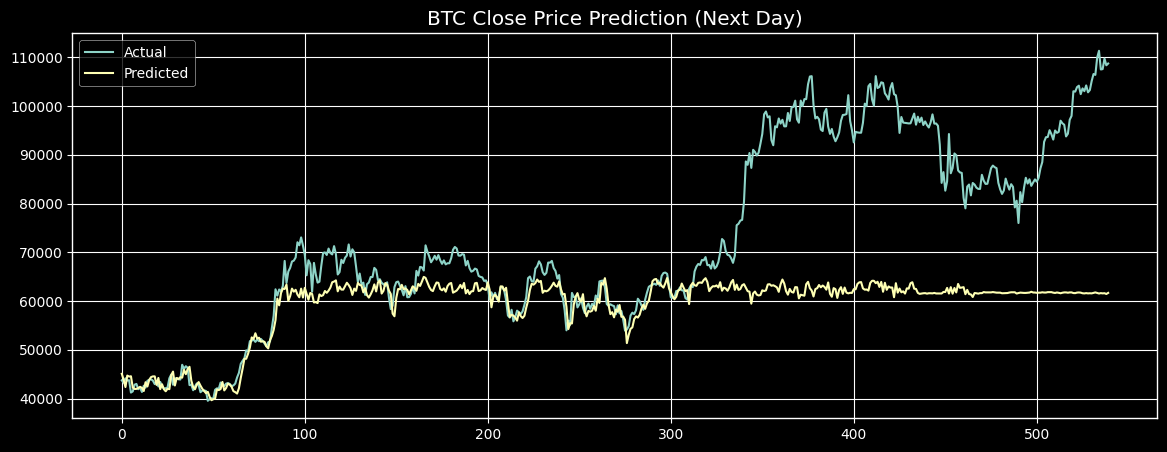

In [64]:
df['Open time'] = pd.to_datetime(df['Open time'])
df.sort_values('Open time', inplace=True)
df.reset_index(drop=True, inplace=True)

df['target_t+1'] = df['Close'].shift(-1)
LAG_DAYS = 7
for lag in range(1, LAG_DAYS + 1):
    df[f'Close_t-{lag}'] = df['Close'].shift(lag)
    df[f'Volume_t-{lag}'] = df['Volume'].shift(lag)
    df[f'Open_t-{lag}'] = df['Open'].shift(lag)
    df[f'High_t-{lag}'] = df['High'].shift(lag)
    df[f'Low_t-{lag}'] = df['Low'].shift(lag)

df['rolling_close_mean_7'] = df['Close'].rolling(window=7).mean()
df['rolling_close_std_7'] = df['Close'].rolling(window=7).std()
df['rolling_volume_mean_7'] = df['Volume'].rolling(window=7).mean()

df['dayofweek'] = df['Open time'].dt.dayofweek
df['month'] = df['Open time'].dt.month

# Drop rows with any NaNs (from shifting & rolling)
df_model = df.dropna().copy()

# Drop unused columns
drop_cols = ['Open time', 'Close time', 'Ignore', 'target_t+1']
features = df_model.drop(columns=drop_cols + ['target_t+1']).columns.tolist()

# Define features and target
X = df_model[features]
y = df_model['target_t+1']

split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 5,
    'eta': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=300,
    evals=[(dtest, "eval")],
    callbacks=[EarlyStopping(rounds=20)]
)

y_pred = model.predict(dtest)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Plot predictions
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("BTC Close Price Prediction (Next Day)")
plt.legend()
plt.show()


t + 1 prediction

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make sure y_test and y_pred are numpy arrays of equal length
y_true = y_test.values
y_pred = model.predict(xgb.DMatrix(X_test))

# Create signals: 1 if predicted price will go up
signal = (y_pred[:-1] > y_true[:-1]).astype(int)

# Actual next-day return
actual_return = y_true[1:] / y_true[:-1] - 1

# Strategy return: only when signal == 1
strategy_return = signal * actual_return

# Parameters
fee_rate = 0.001  # 0.1%
trades = signal.sum()
fees = trades * 2 * fee_rate  # buy and sell fee

# Performance metrics
total_return = np.prod(strategy_return + 1) - 1
annualized_sharpe = np.mean(strategy_return) / np.std(strategy_return) * np.sqrt(252) if np.std(strategy_return) > 0 else 0
win_rate = (strategy_return > 0).sum() / len(strategy_return)
total_trades = trades
trading_period_hours = len(strategy_return) * 24
trades_per_hour = total_trades / trading_period_hours
profit_factor = strategy_return[strategy_return > 0].sum() / abs(strategy_return[strategy_return < 0].sum()) if (strategy_return < 0).sum() != 0 else np.inf

# Max Drawdown
cumulative_returns = np.cumprod(strategy_return + 1)
rolling_max = np.maximum.accumulate(cumulative_returns)
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdown = drawdowns.min()

# Display metrics
print(f"Total Return: {total_return*100:.2f}%")
print(f"Sharpe Ratio (Annualized): {annualized_sharpe:.2f}")
print(f"Max Drawdown: {max_drawdown*100:.2f}%")
print(f"Win Rate: {win_rate*100:.2f}%")
print(f"Total Number of Trades: {total_trades}")
print(f"Total Trading Fees: {fees:.4f} BTC")
print(f"Trading Period (hours): {trading_period_hours}")
print(f"Trades per Hour: {trades_per_hour:.4f}")
print(f"Profit Factor: {profit_factor:.2f}")

# Yearly return
df_returns = pd.DataFrame({
    "Date": df["Open time"].iloc[split_idx + 1:].reset_index(drop=True),
    "Strategy Return": strategy_return
})
df_returns["Date"] = pd.to_datetime(df_returns["Date"])
df_returns["Year"] = df_returns["Date"].dt.year
annual_returns = df_returns.groupby("Year")["Strategy Return"].apply(lambda r: np.prod(r + 1) - 1)

print("\nTotal Return per Year:")
print(annual_returns.map(lambda x: f"{x*100:.2f}%"))


Total Return: 57.22%
Sharpe Ratio (Annualized): 1.19
Max Drawdown: -17.44%
Win Rate: 10.02%
Total Number of Trades: 88
Total Trading Fees: 0.1760 BTC
Trading Period (hours): 12936
Trades per Hour: 0.0068
Profit Factor: 1.67


ValueError: array length 539 does not match index length 547